**Regression：linear model**

model **y_data=b+w*x_data**

利用gradient descent把b和w找出来

In [1]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('Agg') 保存圖像 不顯示圖形
%matplotlib inline 
import random as random
import numpy as np
import csv

In [2]:
x_data=[338.,333.,328.,207.,226.,25.,179.,60.,208.,606.] #自變數
y_data=[640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.] #應變數

In [3]:
#計算梯度的微分函數
def getGrad(b,w):
    # initial b_grad and w_grad
    b_grad=0.0
    w_grad=0.0
    for i in range(10):
        b_grad+=(-2.0)*(y_data[i]-(b+w*x_data[i])) #error = y_data[i]-(b+w*x_data[i])，error平方的個別對b、w微分
        w_grad+=(-2.0*x_data[i])*(y_data[i]-(b+w*x_data[i]))
    return (b_grad,w_grad)

In [11]:
# 生成一组b和w的資料，方便给gradient descent的過程作標記，畫圖用
x = np.arange(-200,-100,1) # bias(b)
y = np.arange(-5,5,0.1) # weight(w)
Z = np.zeros((len(x),len(y))) # color
X,Y = np.meshgrid(x,y) #向量變矩陣
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        
        # Z[j][i]是loss
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] + (y_data[n] - (b + w * x_data[n]))**2
        Z[j][i] = Z[j][i]/len(x_data)

In [5]:
X,Y

(array([[-200, -199, -198, ..., -103, -102, -101],
        [-200, -199, -198, ..., -103, -102, -101],
        [-200, -199, -198, ..., -103, -102, -101],
        ...,
        [-200, -199, -198, ..., -103, -102, -101],
        [-200, -199, -198, ..., -103, -102, -101],
        [-200, -199, -198, ..., -103, -102, -101]]),
 array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
        [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
        [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
        ...,
        [ 4.7,  4.7,  4.7, ...,  4.7,  4.7,  4.7],
        [ 4.8,  4.8,  4.8, ...,  4.8,  4.8,  4.8],
        [ 4.9,  4.9,  4.9, ...,  4.9,  4.9,  4.9]]))

In [14]:
len(Z),len(x),len(y)

(100, 100, 100)

迭代次數為100000，learning rate為0.0000001

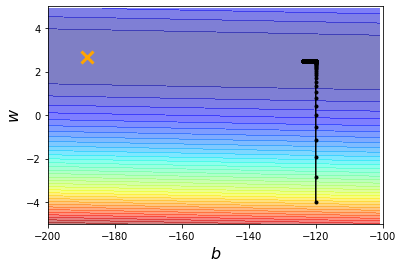

In [12]:
b = -120 # initial b
w = -4 # initial w
lr = 0.0000001 # learning rate
iteration = 100000

# store initial values for plotting，畫圖用
b_history = [b]
w_history = [w]

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # update b and w
    b -= lr * b_grad #學習率乘以原本的loss fun微分後的解，直到微分值為 0，就不再變動
    w -= lr * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet')) #等高圖，都是一維陣列時，len(X)是 Z 的行數，而 len(Y) 是 Z 中的列數
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange') #最佳解
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100) #坐標軸範圍
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

迭代次數不夠到最佳解，以下嘗試提升學習率與迭代次數

提升學習率十倍

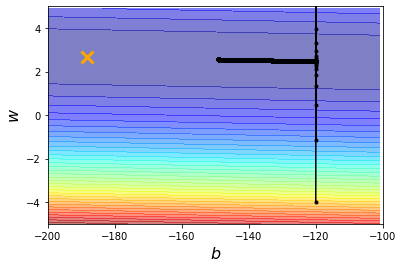

In [13]:
b = -120 # initial b
w = -4 # initial w
lr = 0.000001 # learning rate
iteration = 100000

# store initial values for plotting，畫圖用
b_history = [b]
w_history = [w]

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # update b and w
    b -= lr * b_grad #學習率乘以原本的loss fun微分後的解，直到微分值為 0，就不再變動
    w -= lr * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet')) #等高圖，都是一維陣列時，len(X)是 Z 的列數，而 len(Y) 是 Z 中的行數
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange') #最佳解
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100) #坐標軸範圍
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

再提升學習率十倍，跨幅太大，無法到loss最小處，超出範圍

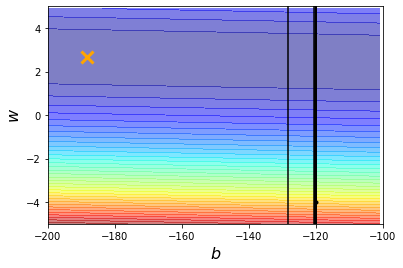

In [15]:
b = -120 # initial b
w = -4 # initial w
lr = 0.00001 # learning rate
iteration = 100000

# store initial values for plotting，畫圖用
b_history = [b]
w_history = [w]

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # update b and w
    b -= lr * b_grad #學習率乘以原本的loss fun微分後的解，直到微分值為 0，就不再變動
    w -= lr * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet')) #等高圖，都是一維陣列時，len(X)是 Z 的列數，而 len(Y) 是 Z 中的行數
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange') #最佳解
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100) #坐標軸範圍
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

迭代次數提升100倍，有到最佳解，但運行時間長

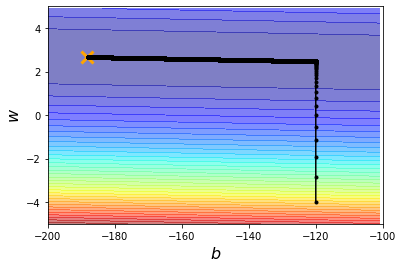

In [19]:
b = -120 # initial b
w = -4 # initial w
lr = 0.0000001 # learning rate
iteration = 10000000

# store initial values for plotting，畫圖用
b_history = [b]
w_history = [w]

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # update b and w
    b -= lr * b_grad #學習率乘以原本的loss fun微分後的解，直到微分值為 0，就不再變動
    w -= lr * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet')) #等高圖，都是一維陣列時，len(X)是 Z 的列數，而 len(Y) 是 Z 中的行數
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange') #最佳解
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100) #坐標軸範圍
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

客製化學習率，給b和w不同的學習率

the function will be y_data=-188.3668387495323+2.6692640713379903*x_data
error 0 is: 73.84441736270833 
error 1 is: 67.4980970060185 
error 2 is: 68.15177664932844 
error 3 is: 28.8291759825683 
error 4 is: 13.113158627146447 
error 5 is: 148.63523696608252 
error 6 is: 96.43143001996799 
error 7 is: 94.21099446925288 
error 8 is: 140.84008808876973 
error 9 is: 161.7928115187101 
the average error is 89.33471866905532


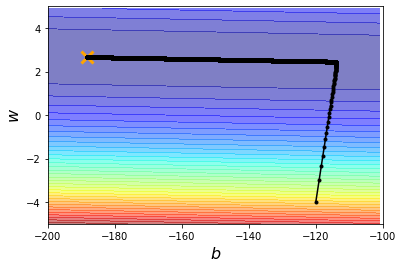

In [21]:
b = -120 # initial b
w = -4 # initial w
lr = 1 # learning rate 放大10倍
iteration = 100000

# store initial values for plotting，畫圖用
b_history = [b]
w_history = [w]

lr_b = 0 #初始學習率
lr_w = 0

# iterations
for i in range(iteration):
    
    # get new b_grad and w_grad
    b_grad,w_grad=getGrad(b,w)
    
    # get the different learning rate for b and w
    # 一開始會較大，而後平緩會較小
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # adagrad
    # update b and w with new learning rate
    b -= lr / np.sqrt(lr_b) * b_grad
    w -= lr / np.sqrt(lr_w) * w_grad
    
    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    
    # output the b w b_grad w_grad
    # print("b: "+str(b)+"\t\t\t w: "+str(w)+"\n"+"b_grad: "+str(b_grad)+"\t\t w_grad: "+str(w_grad)+"\n")
    
# output the final function and its error
print("the function will be y_data="+str(b)+"+"+str(w)+"*x_data")
error=0.0
for i in range(10):
    print("error "+str(i)+" is: "+str(np.abs(y_data[i]-(b+w*x_data[i])))+" ")
    error+=np.abs(y_data[i]-(b+w*x_data[i]))
average_error=error/10
print("the average error is "+str(average_error))

# plot the figure
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()